<a href="https://colab.research.google.com/github/Ankita-Dey/Thesis/blob/main/Clustering_choropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 185 kB/s 
     |████████████████████████████████| 6.3 MB 31.1 MB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shp = "drive/MyDrive/Census_2011_map/2011_Dist.shp"

In [ ]:
df1 = gpd.read_file(shp)
df1['ST_NM'] = df1['ST_NM'].str.upper()
df1 = df1.rename(columns={'DISTRICT': 'District', 'ST_NM': 'State'})
df1 = df1[["State","District","geometry"]]
# df1.head()
# df1.plot(figsize = (8,8))

In [ ]:
# df['state'] = df['state'].replace(['Uttaranchal'],'Uttarakhand')
rename_dist = {'Bauda':'Baudh', 'Chamrajnagar':'Chamarajanagar', 'East Nimar':'Khandwa (East Nimar)', 'Garhchiroli':'Gadchiroli',
 'Janjgir-champa':'Janjgir', 'Kaimur (bhabua)':'Kaimur (Bhabua)', 'Kansiram Nagar':'Kanshiram Nagar', 'Lawangtlai':'Lawngtlai',
 'Leh (ladakh)':'Leh(Ladakh)', 'Maharajganj':'Mahrajganj', 'Marigaon':'Morigaon', 'Nagappattinam':'Nagapattinam',
 'Nicobar':'Nicobars', 'North & Middle Andaman':'North  & Middle Andaman', 'North 24 Parganas':'North Twenty Four Parganas',
 'Pashchim Medinipur':'Paschim Medinipur', 'Ri Bhoi':'Ribhoi', 'Sant Ravi Das Nagar(bhadohi)':'Sant Ravidas Nagar (Bhadohi)',
 'Saraikela-kharsawan':'Saraikela', 'Saran (chhapra)':'Saran', 'Siddharth Nagar':'Siddharthnagar', 'Y.s.r.':'Y.S.R.',
 'South 24 Parganas':'South Twenty Four Parganas', 'Virudunagar':'Virudhunagar', 'West Nimar':'Khargone (West Nimar)'}
df1["District"].replace(rename_dist, inplace=True)
df1.loc[(df1.State == "SIKKIM") & (df1.District == "East"), "District"] = "East District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "West"), "District"] = "West District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "North"), "District"] = "North  District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "South"), "District"] = "South District"
df1.loc[(df1.State == "ARUNANCHAL PRADESH"), "State"] = "ARUNACHAL PRADESH"
df1.loc[(df1.State == "ANDAMAN & NICOBAR ISLAND"), "State"] = "ANDAMAN & NICOBAR ISLANDS"
df1.loc[(df1.State == "DADARA & NAGAR HAVELLI"), "State"] = "DADRA & NAGAR HAVELI"

In [ ]:
# # FOR PERCENTAGE OF PERSONS/MALE/FEMALE WITH A EDUCATION LEVEL
# df11 = pd.read_csv("drive/MyDrive/Data/C08.csv")

# df11 = df11[(df11.Age.isin(["All ages"]))] #['20-24', '24-29','30-34', '34-39','40-44', '44-49','50-54', '54-59','60-64', '64-69']
# df11 = df11.groupby(['State', 'District', 'Urban/Rural', 'Caste', 'Sex'], as_index=False).sum()

# df11["Graduate & above"] = df11["Graduate & above"] + df11['Non-technical degree'] + df11['Technical degree']
# df11["Secondary below Graduate"] = df11["Secondary"] + df11["Higher secondary"]
# df11["Secondary & above"] = df11["Secondary"] + df11["Higher secondary"] + df11["Graduate & above"]
# df11["Literate below Secondary"] = df11['Literate']-df11['Secondary & above']

# for col in df11.columns[6:]:
#     df11[col] = df11[col]*100/df11["Total"]

# df2 = df11[(df11['Urban/Rural'] == "Total") & (df11['Caste']=='All') & (df11['Sex']=='Persons') & (df11['State']!='INDIA') & (df11['District']!='All')]
# df2 = df2[['State', 'District', 'Literate', 'Secondary below Graduate', 'Graduate & above']]

# cols = ['Literate', 'Secondary below Graduate', 'Graduate & above']

In [ ]:
# MALE FEMALE EDUCATOION SEPERATELY

# FOR PERCENTAGE OF PERSONS/MALE/FEMALE WITH A EDUCATION LEVEL
df11 = pd.read_csv("drive/MyDrive/Data/C08.csv")

df11 = df11[(df11.Age.isin(["All ages"]))] #['20-24', '24-29','30-34', '34-39','40-44', '44-49','50-54', '54-59','60-64', '64-69']
df11 = df11.groupby(['State', 'District', 'Urban/Rural', 'Caste', 'Sex'], as_index=False).sum()

df11["Graduate & above"] = df11["Graduate & above"] + df11['Non-technical degree'] + df11['Technical degree']
df11["Secondary below Graduate"] = df11["Secondary"] + df11["Higher secondary"]
df11["Secondary & above"] = df11["Secondary"] + df11["Higher secondary"] + df11["Graduate & above"]
df11["Literate below Secondary"] = df11['Literate']-df11['Secondary & above']

for col in df11.columns[6:]:
    df11[col] = df11[col]*100/df11["Total"]

df11 = df11[(df11['Urban/Rural'] == "Total") & (df11['Caste']=='All') & (df11['State']!='INDIA') & (df11['District']!='All')]
df11 = df11[['State', 'District', 'Sex', 'Literate', 'Secondary below Graduate', 'Graduate & above']]

f = df11[(df11.Sex=='Female')][['State','District','Literate', 'Secondary below Graduate', 'Graduate & above']]
f = f.rename(columns={'Literate':'Literate'+'_F', 'Secondary below Graduate':'Secondary below Graduate'+'_F', 'Graduate & above':'Graduate & above'+'_F'})

m = df11[(df11.Sex=='Male')][['State','District','Literate', 'Secondary below Graduate', 'Graduate & above']]
m = m.rename(columns={'Literate':'Literate'+'_M', 'Secondary below Graduate':'Secondary below Graduate'+'_M', 'Graduate & above':'Graduate & above'+'_M'})

df2 = f.merge(m, on=(["State", "District"]), how='inner').dropna()

cols = ['Literate_F', 'Secondary below Graduate_F', 'Graduate & above_F', 'Literate_M', 'Secondary below Graduate_M', 'Graduate & above_M']

In [ ]:
# df = pd.read_csv("drive/MyDrive/Data/HH1.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Total households', 'Total good households']]

# hh = pd.read_csv("drive/MyDrive/Data/HH7.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Electricity']]
# df = pd.merge(df, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

# hh = pd.read_csv("drive/MyDrive/Data/HH8.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Households with latrine within premises']]
# df = pd.merge(df, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

# hh = pd.read_csv("drive/MyDrive/Data/HH9.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'With bathroom']]
# df = pd.merge(df, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

# hh = pd.read_csv("drive/MyDrive/Data//HH12.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Households with Radio', 'Households with TV',
#        'Households with Computer with internet', 'Households with Computer without internet', 'Households with Landline only', 
#        'Households with mobile only', 'Households with Landline and mobile', 'Households with bicycle', 'Households with motorcycle', 
#        'Households with car', 'Households with TV, Computer, phone and motor vehicle',
#        'Households without any assets', 'Households availing banking services']]
# hh['Households with Computer'] = hh['Households with Computer with internet'] + hh['Households with Computer without internet']
# hh['Households with Phone'] = hh['Households with Landline only'] + hh['Households with mobile only'] + hh['Households with Landline and mobile']
# hh['Households with Motor vehicle'] = hh['Households with motorcycle'] + hh['Households with car']

# hh = hh[['State', 'District', 'Urban/Rural', 'Caste', 'Households with TV', 'Households with Computer', 
#        'Households with Phone', 'Households with Motor vehicle', 'Households with TV, Computer, phone and motor vehicle',
#        'Households without any assets', 'Households availing banking services']]

# df = pd.merge(df, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

# for col in df.columns[5:]:
#     df[col] = df[col]*100/df['Total households']

# df2 = df[(df['Urban/Rural'] == "Total") & (df['Caste']=='All') & (df['State']!='INDIA') & (df['District']!='All')]
# df2 = df2[['State', 'District', 'Total good households',
#        'Electricity', 'Households with latrine within premises',
#        'With bathroom', 'Households with TV', 'Households with Computer', 
#        'Households with Phone', 'Households with Motor vehicle', 'Households with TV, Computer, phone and motor vehicle',
#        'Households without any assets', 'Households availing banking services']]

# cols = ['Total good households',
#        'Electricity', 'Households with latrine within premises',
#        'With bathroom', 'Households with TV', 'Households with Computer', 
#        'Households with Phone', 'Households with Motor vehicle', 'Households with TV, Computer, phone and motor vehicle',
#        'Households without any assets', 'Households availing banking services']

# df2.loc[(df2.State == "CHATTISGARH"), "State"] = "CHHATTISGARH"

In [ ]:
# hh = pd.read_csv("drive/MyDrive/Data/B03.csv")

# hh.loc[(hh['Educational level']=="Technical degree or diploma equal to degree or post-graduate degree"), 'Educational level'] = 'Graduate & above'
# hh.loc[(hh['Educational level']=="Graduate and above other than technical degree"), 'Educational level'] = 'Graduate and above'

# hh = hh[(hh['Educational level'].isin(['Literate', 'Graduate & above']))]
# hh = hh.groupby(['State', 'District', 'Urban/Rural', 'Caste', 'Sex', 'Educational level'], as_index=False).sum()

# hh["Total Non worker"] = hh['Total Non worker']+hh["Total Marginal worker"]
# hh["Non worker available for work"] = hh['Non worker available for work']+hh["Marginal worker available for work"]

# hh["Available for work"] = hh['Non worker available for work']/hh['Total Non worker']
# hh["Main worker"] = hh['Main worker']/hh['Total']
# hh["Non worker"] = hh['Total Non worker']/hh['Total']

# hh = hh[(hh['Urban/Rural'] == "Total") & (hh['Caste']=='All') & (hh['State']!='INDIA') & (hh['District']!='All')]
# # hh = hh[['State','District','Main worker','Non worker','Available for work']]

# # dfList = [y for x, y in df2.groupby(['Sex','Educational level'], as_index=False)]
# # dfList[0]
# # from functools import reduce
# # reduce(lambda x, y: pd.merge(x, y, on = ['State', 'District']), dfList)

# f_grad = hh[(hh.Sex=='Female') & (hh['Educational level']=='Graduate & above')][['State','District','Main worker','Non worker','Available for work']]
# s = '-f_grad'
# f_grad = f_grad.rename(columns={'Main worker':'Main worker'+s, 'Non worker':'Non worker'+s, 'Available for work':'Available for work'+s})

# f_lit = hh[(hh.Sex=='Female') & (hh['Educational level']=='Literate')][['State','District','Main worker','Non worker','Available for work']]
# s = '-f_lit'
# f_lit = f_lit.rename(columns={'Main worker':'Main worker'+s, 'Non worker':'Non worker'+s, 'Available for work':'Available for work'+s})

# m_grad = hh[(hh.Sex=='Male') & (hh['Educational level']=='Graduate & above')][['State','District','Main worker','Non worker','Available for work']]
# s = '-m_grad'
# m_grad = m_grad.rename(columns={'Main worker':'Main worker'+s, 'Non worker':'Non worker'+s, 'Available for work':'Available for work'+s})

# m_lit = hh[(hh.Sex=='Male') & (hh['Educational level']=='Literate')][['State','District','Main worker','Non worker','Available for work']]
# s = '-m_lit'
# m_lit = m_lit.rename(columns={'Main worker':'Main worker'+s, 'Non worker':'Non worker'+s, 'Available for work':'Available for work'+s})

# hh = m_grad.merge(m_lit, on=(["State", "District"]), how='inner')
# df2 = f_grad.merge(f_lit, on=(["State", "District"]), how='inner')
# df2 = df2.merge(hh, on=(["State", "District"]), how='inner')

# df2 = df2.dropna()

# cols = ['Main worker-f_grad', 'Non worker-f_grad', 'Available for work-f_grad', 'Main worker-f_lit', 'Non worker-f_lit',
#        'Available for work-f_lit', 'Main worker-m_grad', 'Non worker-m_grad', 'Available for work-m_grad', 
#         'Main worker-m_lit', 'Non worker-m_lit', 'Available for work-m_lit']

Text(0.5, 1.0, 'SSE on K-Means based on # of clusters')

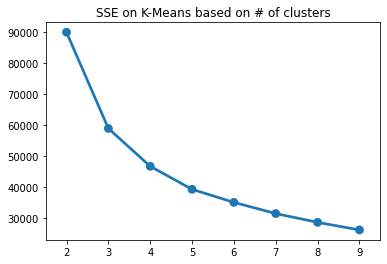

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
np.random.seed(8) # for reproducability
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(df2[cols])
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
# plt.show()

In [ ]:
np.random.seed(8)
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit(df2[cols])
df2['cluster'] = cluster.labels_
df2['StateDist'] = df2['State']+'-'+df2['District']

for i in range(5):
    print("Cluster: " + str(i) + '\n')
    print("The Members: " + ' | '.join(list(df2[df2['cluster'] == i]['StateDist'].values)) + '\n')
    print("Total Members: " + str(len(list(df2[df2['cluster'] == i]['StateDist'].values))) + '\n')


Cluster: 0

The Members: ANDHRA PRADESH-Adilabad | ANDHRA PRADESH-Anantapur | ANDHRA PRADESH-Kurnool | ANDHRA PRADESH-Medak | ANDHRA PRADESH-Nizamabad | ANDHRA PRADESH-Prakasam | ANDHRA PRADESH-Srikakulam | ANDHRA PRADESH-Vizianagaram | ARUNACHAL PRADESH-Dibang Valley | ARUNACHAL PRADESH-Lohit | ARUNACHAL PRADESH-Lower Dibang Valley | ARUNACHAL PRADESH-Tawang | ARUNACHAL PRADESH-Upper Siang | ARUNACHAL PRADESH-Upper Subansiri | ARUNACHAL PRADESH-West Kameng | ARUNACHAL PRADESH-West Siang | ASSAM-Barpeta | ASSAM-Bongaigaon | ASSAM-Chirang | ASSAM-Darrang | ASSAM-Goalpara | ASSAM-Karbi Anglong | ASSAM-Kokrajhar | ASSAM-Morigaon | ASSAM-Nagaon | ASSAM-Sonitpur | ASSAM-Tinsukia | ASSAM-Udalguri | BIHAR-Arwal | BIHAR-Aurangabad | BIHAR-Begusarai | BIHAR-Bhagalpur | BIHAR-Bhojpur | BIHAR-Buxar | BIHAR-Gaya | BIHAR-Gopalganj | BIHAR-Jehanabad | BIHAR-Kaimur (Bhabua) | BIHAR-Lakhisarai | BIHAR-Muzaffarpur | BIHAR-Nalanda | BIHAR-Saran | BIHAR-Sheikhpura | BIHAR-Siwan | BIHAR-Vaishali | CHHATTI

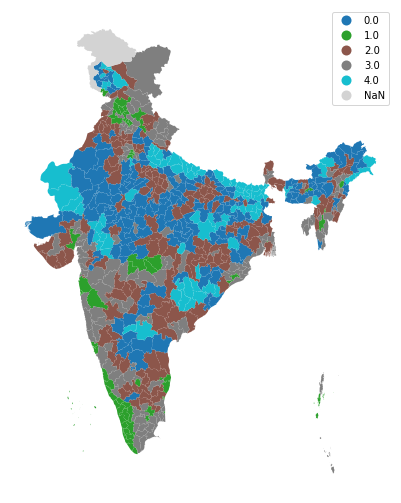

In [ ]:
# Assign labels into a column
df = df1.merge(df2, on=(["State", "District"]), how='left').set_index(['State', 'District'])

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including 
# a legend and with no boundary lines
df.plot(
    column='cluster', categorical=True, legend=True, linewidth=0, ax=ax, missing_kwds= {"color": "lightgrey"}
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

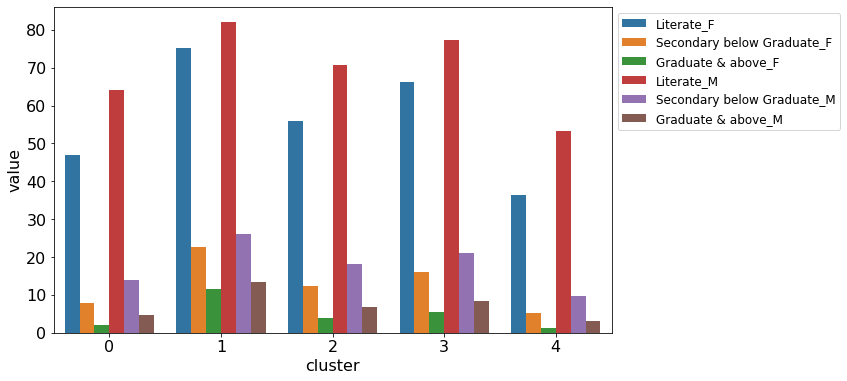

In [ ]:
plt.rcParams.update({'font.size': 16})
visualize = pd.DataFrame(kmeans.cluster_centers_) #.reset_index()
visualize = visualize.T
visualize['column'] = cols
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')# Visualize the result
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.legend(bbox_to_anchor = (1, 1), prop={'size': 12})
# plt.legend(bbox_to_anchor = (0.1, 1), prop={'size': 12})